# GIS 712: Environmental Earth Observation and Remote Sensing  
## Working with raster images in python

<img src="imgs/image.jpg" width="600" >

We will be using publicly available datasets from the European Space Agency Sentinel 2 satellite imagery. Take a moment to read up on [Sentinel 2 data](https://sentinel.esa.int/web/sentinel/missions/sentinel-2/overview)

If you want to dwl the data yourself please go to [Copernicus Scihub](https://scihub.copernicus.eu/) until mid-2023 or the [Copernicus Data Space Environment](https://dataspace.copernicus.eu) and create an account if you haven't got one. Once logged on choose "Open Hub" and navigate to the Alligator River, NC, draw a polygon around the area and download 2 images of the area, I chose Aug 2019.

Alternatively you can use the 2 images in your data subfolder:  
raster_data_in_python/data/S2A_..  
raster_data_in_python/data/S2B_..

A little more about Sentinel 2 data:
The Sentinel-2 mission consists of two satellites developed to support vegetation, land cover, and environmental monitoring. The Sentinel-2A satellite was launched by ESA on June 23, 2015, and operates in a sun-synchronous orbit with a 10-day repeat cycle. A second identical satellite (Sentinel-2B) was launched on March 7, 2017. Together they cover all Earth’s land surfaces, large islands, and inland and coastal waters every 5 days.
The Sentinel-2 MultiSpectral Instrument (MSI) acquires data across 13 spectral bands ranging from Visible and Near-Infrared (VNIR) to Shortwave Infrared (SWIR) [wavelengths](https://www.usgs.gov/centers/eros/science/usgs-eros-archive-sentinel-2?qt-science_center_objects=0#qt-science_center_objects)
along a 290-km orbital swath. The MSI sensor data are complementary to data acquired by the U.S. Geological Survey (USGS) Landsat 8 Operational Land Imager (OLI) and Landsat 7 Enhanced Thematic Mapper Plus (ETM+).

In comparison to Landsat, Sentinel-2 images are provided in a regular tiling system that is referenced to the U.S. Military Grid Reference System (MGRS). Because the MGRS is not related to the acquisition path of the Sentinel-2 satellite, distributed tiles can be fully or partially covered by image data (in comparison, Landsat path/row tiles always have full image coverage). Partially covered tiles correspond to those at the edge of the satellite swath. 
 
Unzip the 2 zipped files from the data subfolder and have a look at the S2 data in these 2 folders: S2A_MSIL1C_20190831T153911_N0208_R011_T18SVE_20190831T192015.SAFE and S2B_MSIL1C_20190829T154819_N0208_R054_T18SVE_20190829T190944.SAFE. Notice the structure of the image folders ([here](https://earth.esa.int/eogateway/activities/safe-the-standard-archive-format-for-europe/safe-2.x-basic-information)). The meaning of each of the files is explained [here](https://sentinel.esa.int/web/sentinel/user-guides/sentinel-2-msi/data-formats).

Have a look at the naming convention described [here](https://sentinel.esa.int/en/web/sentinel/user-guides/sentinel-2-msi/naming-convention#:~:text=The%20compact%20naming%20convention%20is%20arranged%20as%20follows%3A,first%20date%20%28YYYYMMDDHHMMSS%29%20is%20the%20datatake%20sensing%20time.)  (https://sentinel.esa.int/web/sentinel/user-guides/sentinel-2-msi/naming-convention)

**Q1: What products are we looking at, what tiles and when were they acquired?**
We are looking at Sentinel-2A/2B products. The S2A product is MSI Level-1 (MSIL1C), taken on august 31st, 2019 at 3:39:11 PM Greenwich mean time (20190831T153911), the processing baseline number is 0208 (N0208), the relative orbit number is 011 (R011), and MGRS tile number field is 18SVE (T18SVE). The S2B product is MSI Level-1 (MSIL1C), taken on august 29th, 2019 at 3:49:19 PM Greenwich mean time (20190829T154819), the processing baseline number is 0208 (N0208), the relative orbit number is 054 (R054), and the MGRS tile number field is 18SVE (T18SVE).

**Q2: In each folder, navigate to the GRANULE/IMG_DATA/ and pick the TCI.jp2 which is the true color image - add those 2 TCI files (one from each data folder) to QGIS and have a look, do they look different?**

### Let's import the necessary libraries

rasterio: the main rasterio function, reads and writes [raster data](https://rasterio.readthedocs.io/en/latest/)  

numpy: fundamental package for scientific computing, such as [array calculations](https://numpy.org/)  

matplotlib: it is standard to utilize the abbreviation “plt” when importing the pyplot submodule from Matplotlib

In [1]:
import rasterio 
import numpy as np
import matplotlib.pyplot as plt 
# the line below instructs Jupyter to embed plots within a notebook
%matplotlib inline 

### Checking out current working directory:

In [2]:
import os
os.getcwd()
# os.chdir('/Users/mtulbure/Downloads/raster_data_in_python')

'c:\\Users\\cblim\\Documents\\NCSU\\Courses\\GIS712\\code\\Lectures\\Lecture05\\raster_data_in_python'

### Open a geospatial image, in this case the tci 
When we open an image in rasterio we create a dataset object.

In [3]:
# filepath to our image
image_fp = os.path.join(os.getcwd(), 'data', 's2_20190831/T18SVE_20190831T153911_TCI.jp2')
print(image_fp)

c:\Users\cblim\Documents\NCSU\Courses\GIS712\code\Lectures\Lecture05\raster_data_in_python\data\s2_20190831/T18SVE_20190831T153911_TCI.jp2


In [4]:
dataset = rasterio.open(image_fp)
print(dataset)
print(type(dataset)) # check the type of the variable 'dataset'
# when we open an image in rasterio we create a dataset object

<open DatasetReader name='c:/Users/cblim/Documents/NCSU/Courses/GIS712/code/Lectures/Lecture05/raster_data_in_python/data/s2_20190831/T18SVE_20190831T153911_TCI.jp2' mode='r'>
<class 'rasterio.io.DatasetReader'>


### Lets have a looks at some of the image attributes
Dataset objects have some of the same attributes as Python file objects.  
Check the [rasterio docs](https://rasterio.readthedocs.io/en/stable/quickstart.html)   opening-a-dataset-in-reading-mode

In [5]:
# What is the name of this image?
print('Image filename: ', dataset.name)

Image filename:  c:/Users/cblim/Documents/NCSU/Courses/GIS712/code/Lectures/Lecture05/raster_data_in_python/data/s2_20190831/T18SVE_20190831T153911_TCI.jp2


In [6]:
# How many bands does this image have?
print('Number of bands in image is: ', dataset.count)

Number of bands in image is:  3


In [7]:
# How many rows and columns?
print('Image size is: ', dataset.shape)
print('Image # of rows is: ', dataset.width)
print('Image # of columns is: ', dataset.height)

Image size is:  (10980, 10980)
Image # of rows is:  10980
Image # of columns is:  10980


In [8]:
# What driver was used to open the raster?/raster's file format
print('Raster driver: ', dataset.driver)

Raster driver:  JP2OpenJPEG


In [9]:
# What are the no data values?
print('Raster no data values: ', dataset.nodatavals)

Raster no data values:  (None, None, None)


In [10]:
# What is the raster's projection? https://www.spatialreference.org/
print('Image projection: ', dataset.crs)

Image projection:  EPSG:32618


In [11]:
# What's the dataset bounding box?
print('dataset boundign box: ', dataset.bounds)

dataset boundign box:  BoundingBox(left=399960.0, bottom=3890220.0, right=509760.0, top=4000020.0)


In [12]:
# What is the raster's geotransform?
# this is a set of numbers, which gives us the pixel size (1st and 4th)
# upper left corner (3rd and 6th), rotation (2nd)
print('Image geotransform: ', dataset.transform)

Image geotransform:  | 10.00, 0.00, 399960.00|
| 0.00,-10.00, 4000020.00|
| 0.00, 0.00, 1.00|


In [13]:
print('All raster metadata:')
print(dataset.meta)
print('\n')

All raster metadata:
{'driver': 'JP2OpenJPEG', 'dtype': 'uint8', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 3, 'crs': CRS.from_epsg(32618), 'transform': Affine(10.0, 0.0, 399960.0,
       0.0, -10.0, 4000020.0)}




### To access the raster bands we can use the read() method
To read in a raster band as a variable.    
Read more [here](https://rasterio.readthedocs.io/en/latest/api/rasterio.io.html) #rasterio.io.BufferedDatasetWriter.read


**Q3: how many values can the band have?** Hint: look at the data type

In [14]:
# Open the 1st, red band in our image (if '1' was left out, then would read in all bands)
red = dataset.read(1)
print(red.shape) # check out the dimensions of the image

print(type(red)) # check out the type of the variable we called red- when we load the img into memory we read it as a numpy array

print(red.dtype) # data type of the values in the red band

(10980, 10980)
<class 'numpy.ndarray'>
uint8


### Let's have a look at the band stats:
Read all bands

In [15]:
array = dataset.read()

# Calculate statistics for each band
stats = []
for band in array:
    stats.append({
        'min': band.min(),
        'mean': band.mean(),
        'median': np.median(band),
        'max': band.max()})

# Show stats for each band
stats

[{'min': 1, 'mean': 28.50740222328393, 'median': 26.0, 'max': 255},
 {'min': 30, 'mean': 46.423968160357795, 'median': 44.0, 'max': 255},
 {'min': 44, 'mean': 65.83673051018411, 'median': 63.0, 'max': 255}]

### Let's have a look at the image using the plot.show() function

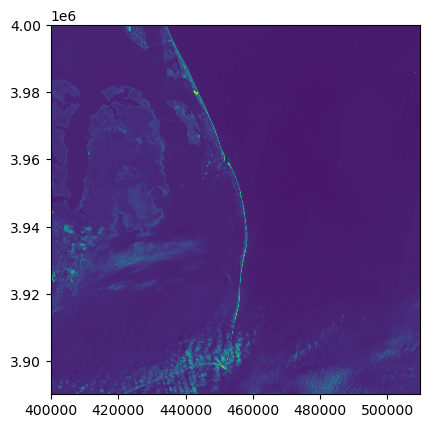

<Axes: >

In [16]:
from rasterio.plot import show
# plot the red band
show((dataset, 1))

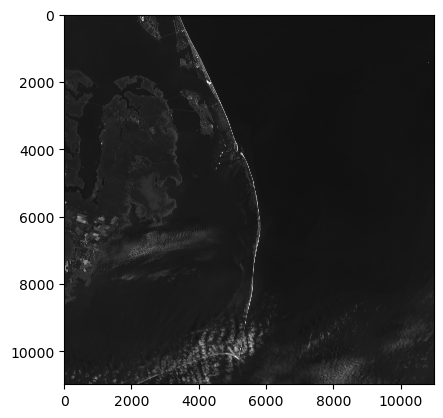

<Axes: >

In [17]:
show(red, cmap='gray')

### Plot all 3 bands using subplots from matplolib


Text(0.5, 1.0, 'Blue')

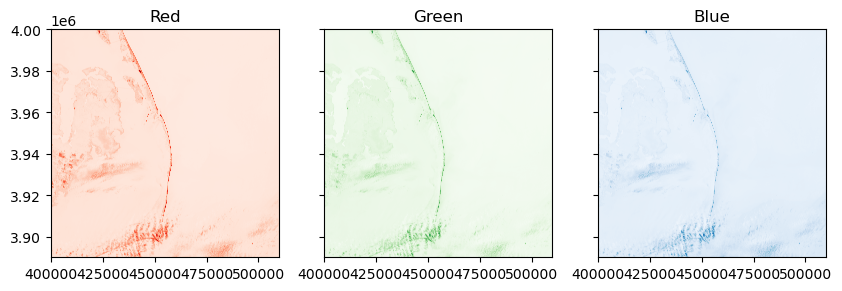

In [18]:
# Initialize subplots
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(10, 4), sharey=True)

# Plot rgb
show((dataset, 1), cmap='Reds', ax=ax1)
show((dataset, 2), cmap='Greens', ax=ax2)
show((dataset, 3), cmap='Blues', ax=ax3)

# Add titles
ax1.set_title("Red")
ax2.set_title("Green")
ax3.set_title("Blue")

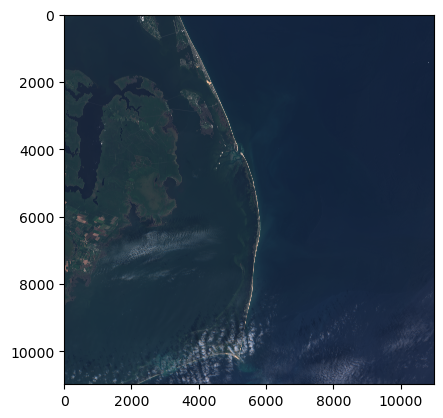

In [19]:
# Read the band values into numpy arrays
full_img = dataset.read()
# Create RGB natural color composite stack
rgb = np.dstack(full_img) #NumPy function that stacks 2D arrays along the third dimension, combining them into a 3D array.
# Let's see how our color composite looks like
plt.imshow(rgb)

#### **Note**: if the image above was too big for your computer's memory, clip the img and replot!

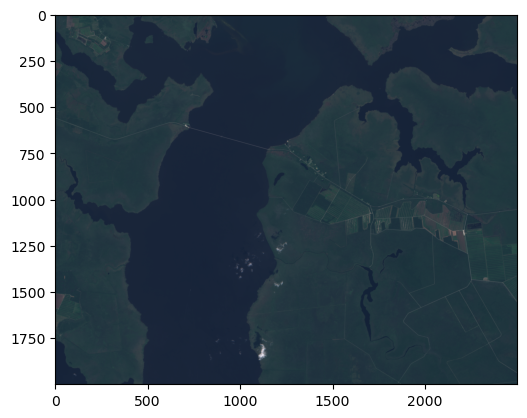

In [20]:
# clipping img by slicing the np.array
clipped_img = full_img[:, 2000:4000:, 0:2500]
clipped_img.shape
rgb = np.dstack(clipped_img)
# Let's see how our color composite looks like
plt.imshow(rgb)

### Open and Read bands: RED, NIR and GREEN separately using rasterio.open

In [21]:
# open bands
red_band = rasterio.open("./data/s2_20190831/T18SVE_20190831T153911_B04.jp2")
nir_band = rasterio.open("./data/s2_20190831/T18SVE_20190831T153911_B08.jp2")
green_band = rasterio.open("./data/s2_20190831/T18SVE_20190831T153911_B03.jp2")

# read bands
red = red_band.read(1)
nir = nir_band.read(1)
green = green_band.read(1)

### Create a raster stack using the three bands opened above:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


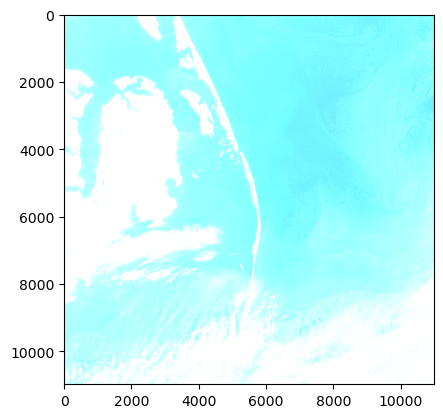

In [22]:
# Create the composite by stacking nir, red, green
nrg = np.dstack((nir, red, green))
# Let's see how our color composite looks like
plt.imshow(nrg)

In [23]:
# checking the data type!
nrg.dtype

dtype('uint16')

#### **Note**: The rgb image was already 8-bit so 0-255 pixel values. If it was not uint8, we would have to stretch the image appropriately or it wouldn't show up right during plotting.

#### Let's create a function to normalize the grid values

In [24]:
# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))


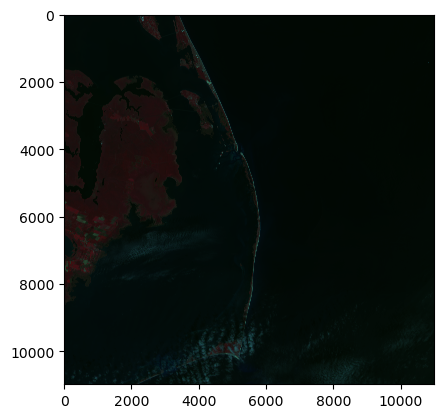

In [36]:
# Normalize the bands using the function that we defined earlier
nirn = normalize(nir)
redn = normalize(red)
greenn = normalize(green)

# Create the composite by stacking
nrgn = np.dstack((nirn, redn, greenn))

# Let's see how our color composite looks like
plt.imshow(nrgn)

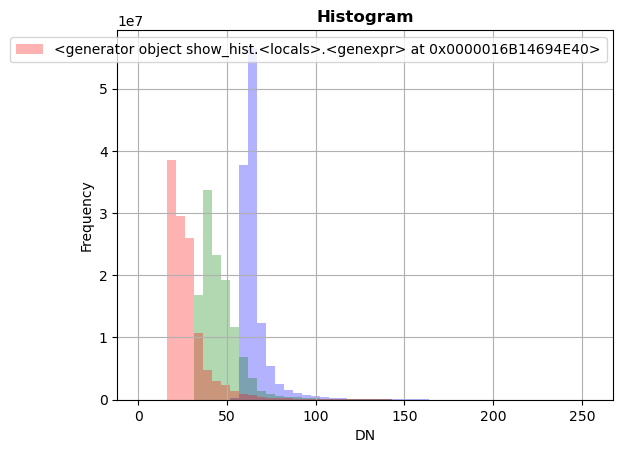

In [37]:
# using rasterio by using the plot.show_hist() function in rasterio for visualizing 
# histograms of pixel values in a raster dataset.
from rasterio.plot import show_hist

# lw: This parameter controls the line width of the histogram plot. 
# Setting it to 0.0 means no lines will be drawn between the histogram bars.

# stacked: When set to False, it indicates that the histogram bars should 
# not be stacked on top of each other. 
# Each band will have its own histogram. When set to True, the histograms 
# of different bands are stacked, which can be useful for visualizing the distribution of combined bands.

# alpha: transparency

# histtype: This parameter specifies the type of histogram to plot. 
# 'stepfilled' means that the histogram bars are drawn as filled steps.

show_hist(dataset, bins=50, lw=0.0, stacked=False, alpha=0.3,
      histtype='stepfilled', title="Histogram")

#### Let's compute one of the most common indices in RS, namely the [Normalized difference vegetation index/NDVI](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index)

In [38]:
# just ignoring this error because the image has lots of NaN pixels
np.seterr(divide='ignore', invalid='ignore')

# note that in python division of integers leads to integers so we need to specify floats in order to get floats
ndvi = (nir.astype(float)-red.astype(float))/(nir.astype(float)+red.astype(float))

In [39]:
print('\nMax NDVI: {m}'.format(m=ndvi.max()))
print('Mean NDVI: {m}'.format(m=ndvi.mean()))
print('Median NDVI: {m}'.format(m=np.median(ndvi)))
print('Min NDVI: {m}'.format(m=ndvi.min()))


Max NDVI: 0.9992927864214993
Mean NDVI: -0.1887426079883502
Median NDVI: -0.3154034229828851
Min NDVI: -0.9959839357429718


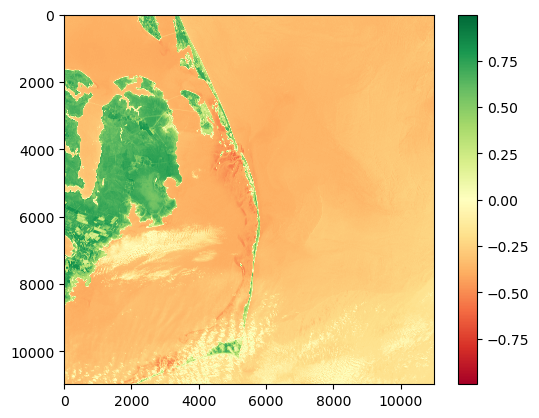

In [40]:
plt.imshow(ndvi, cmap="RdYlGn")
plt.colorbar()
plt.show()
# Note that the vegetation has high NDVI values and water has low NDVI.

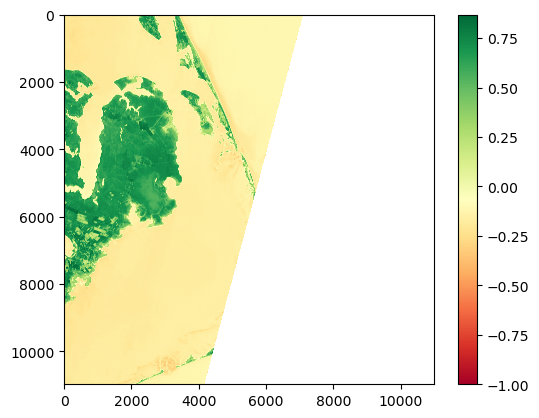

In [41]:
# Now can you calculate the NDVI for the 2nd Sentinel 2 image?
# found here: /data/s2_20190829
red_band_2 = rasterio.open("./data/s2_20190829/T18SVE_20190829T154819_B04.jp2")
nir_band_2 = rasterio.open("./data/s2_20190829/T18SVE_20190829T154819_B08.jp2")

red_2 = red_band_2.read(1)
nir_2 = nir_band_2.read(1)

ndvi_2 = (nir_2.astype(float)-red_2.astype(float))/(nir_2.astype(float)+red_2.astype(float))

plt.imshow(ndvi_2, cmap="RdYlGn")
plt.colorbar()
plt.show()

<class 'numpy.ndarray'>
(10980, 10980)


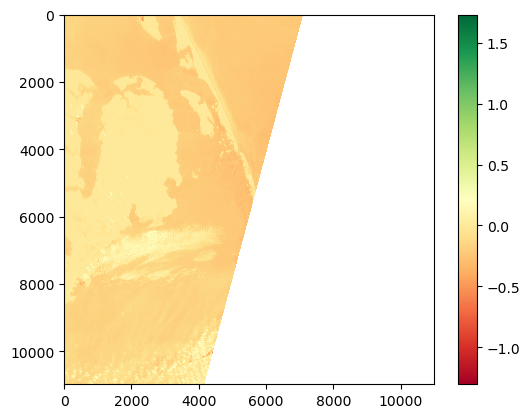

In [42]:
# take the difference between the 2 ndvi values
ndvi_diff = ndvi - ndvi_2
print(type(ndvi_diff))
print(ndvi_diff.shape)
plt.imshow(ndvi_diff, cmap="RdYlGn")
plt.colorbar()
plt.show()

#### **Note**: As an aside - if you want to dwl lots of Sentinel images, it may become tedious to use the SentinelHub, in which case you may want to interact with the API using [sentinelsat](https://github.com/sentinelsat/sentinelsat)